<a href="https://colab.research.google.com/github/lletridung/baitapai/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [67]:
folder = '/content/drive/MyDrive/Food/'
photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('bánh cuốn '):
    output = 1

  if file.startswith('bánh chưng '):
    output = 2    

  if file.startswith('bánh mì '):
    output = 3  

  if file.startswith('bánh pía '):
    output = 4
       
  if file.startswith('bánh xèo '):
    output = 5
    
  if file.startswith('bún bò '):
    output = 6
    
  if file.startswith('cơm sườn '):
    output = 7
    
  if file.startswith('chả giò '):
    output = 8
    
  if file.startswith('phở '):
    output = 9
    
  if file.startswith('thịt kho trứng '):
    output = 10
  img = load_img(folder+file,target_size=(40,30))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)        
photos=asarray(photos)
labels=asarray(labels)
print(photos.shape,labels.shape)
save('Food_photos.npy',photos)
save('Food_labels.npy',labels)

(326, 40, 30, 3) (326,)


In [68]:
print(labels.shape)
photos.shape

(326,)


(326, 40, 30, 3)

In [69]:
x_train = np.load('/content/Food_photos.npy')
y_train = np.load('/content/Food_labels.npy')

In [70]:
print(x_train.shape)
print(y_train.shape)

(326, 40, 30, 3)
(326,)


In [71]:

x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train,10)

In [72]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(40,30,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 40, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 20, 15, 32)       0         
 g2D)                                                            
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 20, 15, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 20, 15, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 10, 8, 64)        0         
 g2D)                                                            
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 10, 8, 64)        

In [73]:
train = model.fit(x_train,y_train,batch_size=5,epochs = 20,verbose = 1)

Epoch 1/20
66/66 [==============================] - 2s 23ms/step - loss: 0.0774 - accuracy: 0.9847
Epoch 2/20
66/66 [==============================] - 2s 35ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
66/66 [==============================] - 2s 28ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0

In [75]:
model.save('Nhandangdoan.h5')

In [76]:
classes = ["bánh cuốn","bánh chưng","bánh mì","bánh pía","bánh xèo","bún bò","cơm sườn","chả giò","phở","thịt kho trứng"]

1/1 [==============================] - 0s 131ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


'bánh cuốn'

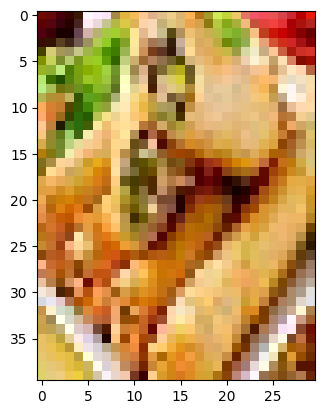

In [78]:
img = load_img('/content/drive/MyDrive/Food/chả_giò (1).jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,40,30,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]